## Hyperbolic PDES - The Wave Equation - Explicit Method

In [1]:
%pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


We are going to solve the Non-Dimensionalised Wave Equation with the explicit finite difference method.

\begin{equation}
\frac{\partial^2u}{\partial t^2} = \frac{\partial^2u}{\partial x^2}
\end{equation}
\begin{equation}
\text{ for } 0 \leq x \leq 1 \text{ and } 0 \leq t \leq 2
\end{equation}

Subject to the following conditions:
\begin{gather}
u(t, 0) = u(t, 1) = 0\ \ \ \   \forall t\\
u(0, x) = f(x) = sin(\pi x)\ \ \ \   \forall x\\
u_t(0, x) = 0\ \ \ \    \forall x
\end{gather}

## Step 1: Create Grid Points

In [2]:
# Length of x
Lx = 1

# Distance between columns
h = 0.2

# How many columns do we need? (including phantom columns)
nx = int((Lx - 0)/h)

# x_Positions (where is it on the length scale?)
x_grid = np.arange(0, Lx + h, h)

print(nx)
print(x_grid)

5
[0.  0.2 0.4 0.6 0.8 1. ]


In [3]:
# Length of y
Lt = 2

# Distance between rows
k = 0.2

# How many rows do we need? (including phantom rows)
nt = int((Lt - 0)/k)

# t_Positions
t_grid = np.arange(0, Lt + k, k)

## Step 2: Condition

In [4]:
# create matrices of values ([t = row, x = column])
uval = np.zeros([len(t_grid), len(x_grid)])
print(uval)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [5]:
# initial condition #1: u(x = column, t = row = 0) = f(x_i) = sin(pi*x_i)
for i in range(1, nx):
    uval[0, i] = np.sin(np.pi*x_grid[i])
print(uval)

[[0.         0.58778525 0.95105652 0.95105652 0.58778525 0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


In [6]:
# initial condition #1: u(x = column, t = row = 0) = sin(pi*x)
for i in range(1, nx):
    uval[0, i] = np.sin(np.pi*x_grid[i])

# initial condition #2: u(x = column, t = row = 1) = 0.5(u(i+1,0) + u(i-1, 0))
for j in range(1, nx):
    uval[1, j] = 0.5*(uval[0, j+1] + uval[0, j-1])
print(uval)

[[0.         0.58778525 0.95105652 0.95105652 0.58778525 0.        ]
 [0.         0.47552826 0.76942088 0.76942088 0.47552826 0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]


## Step 3: Loop

In [12]:
for n in range(1, nt): #t (keep value u(0, j) = 0 and u(5, j) = 0, boundary condition included in the loop)
    for i in range(1, nx): #x
            uval[n+1, i] = uval[n, i-1] + uval[n, i+1] - uval[n-1, i]

In [11]:
print(uval)

[[ 0.          0.58778525  0.95105652  0.95105652  0.58778525  0.        ]
 [ 0.          0.47552826  0.76942088  0.76942088  0.47552826  0.        ]
 [ 0.          0.18163563  0.29389263  0.29389263  0.18163563  0.        ]
 [ 0.         -0.18163563 -0.29389263 -0.29389263 -0.18163563  0.        ]
 [ 0.         -0.47552826 -0.76942088 -0.76942088 -0.47552826  0.        ]
 [ 0.         -0.58778525 -0.95105652 -0.95105652 -0.58778525  0.        ]
 [ 0.         -0.47552826 -0.76942088 -0.76942088 -0.47552826  0.        ]
 [ 0.         -0.18163563 -0.29389263 -0.29389263 -0.18163563  0.        ]
 [ 0.          0.18163563  0.29389263  0.29389263  0.18163563  0.        ]
 [ 0.          0.47552826  0.76942088  0.76942088  0.47552826  0.        ]
 [ 0.          0.58778525  0.95105652  0.95105652  0.58778525  0.        ]]


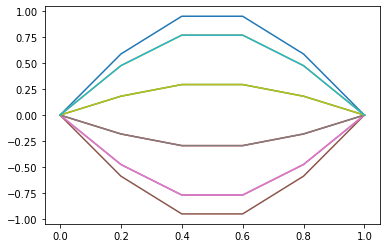

In [15]:
for i in range(0, nt):
    plt.plot(x_grid, uval[i,:])